# Inverse transform method.

$$
f(x) \Rightarrow F(x)=u \sim Unif(0,1) \Rightarrow F^{-1}(u) = x
$$

# Accept reject method

- f(x) => we want to generate
- g(x) => we can generate
- find c => max(f(x)/g(x))
- generate u from unif(0,1), x from g and see if c <= f(x)/(g(x)*c)
- if yes x is added else discarded try again

## properties

- Do not change the configuration of u NEVER
- Range of x defines the range of sample

In [88]:
f <- \(x) x/4 * exp(-(x**2)/8)
g <- \(x) 1

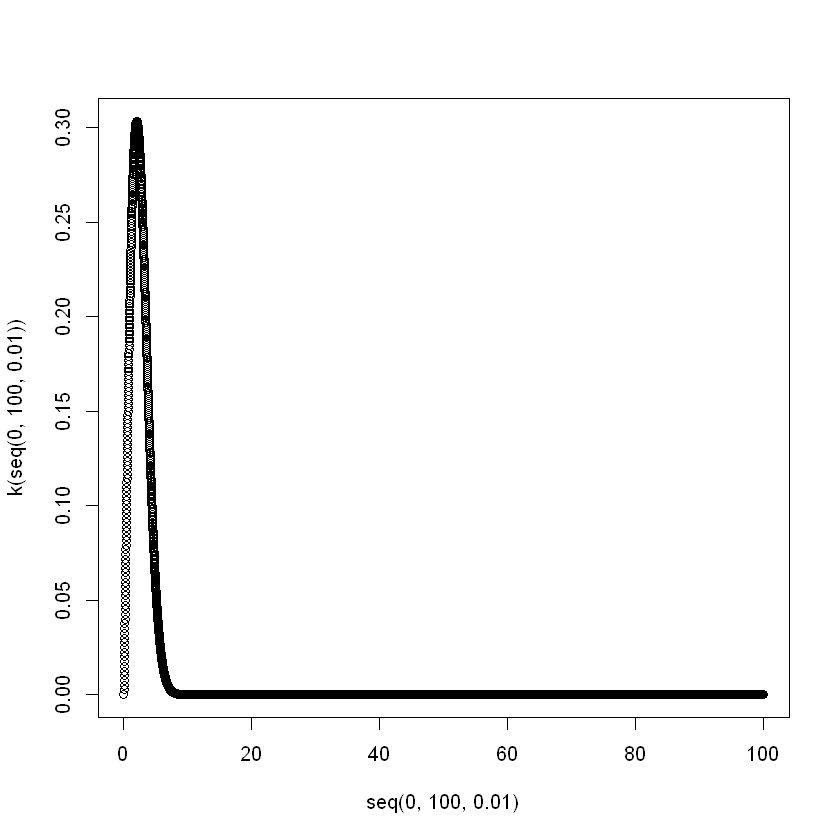

In [89]:
k <- \(x) f(x)/g(x)
plot(seq(0,100,0.01), k(seq(0,100,0.01)))

In [90]:
c <- optimize(\(x) f(x)/g(x), c(0, 100), maximum=1)$objective #find max value of f(x)/g(x)

In [111]:
sample <- numeric(1000)
for(i in 1:1000){
    repeat{
        u <- runif(1)
        x <- runif(1, 0, 7)
        if(u <= f(x)/(c*g(x))) break
    }
    sample[i] <- x
}

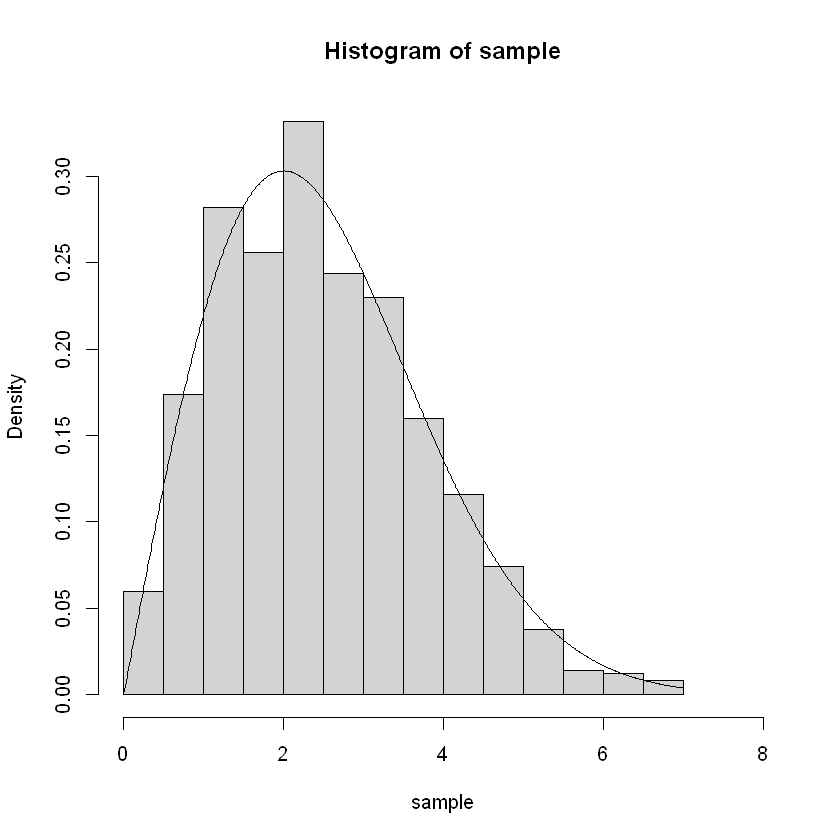

In [112]:
hist(sample, freq = 0, xlim=c(0,8))
lines(seq(0,7,0.01), drayleigh(seq(0,7,0.01),2))

# sums and mixtures

- The same formulas binding distributions together can be used with the samples from these distributions.
- Summing the lines of matrix that have the same distribution items will result in sample from $\sum f(x)$

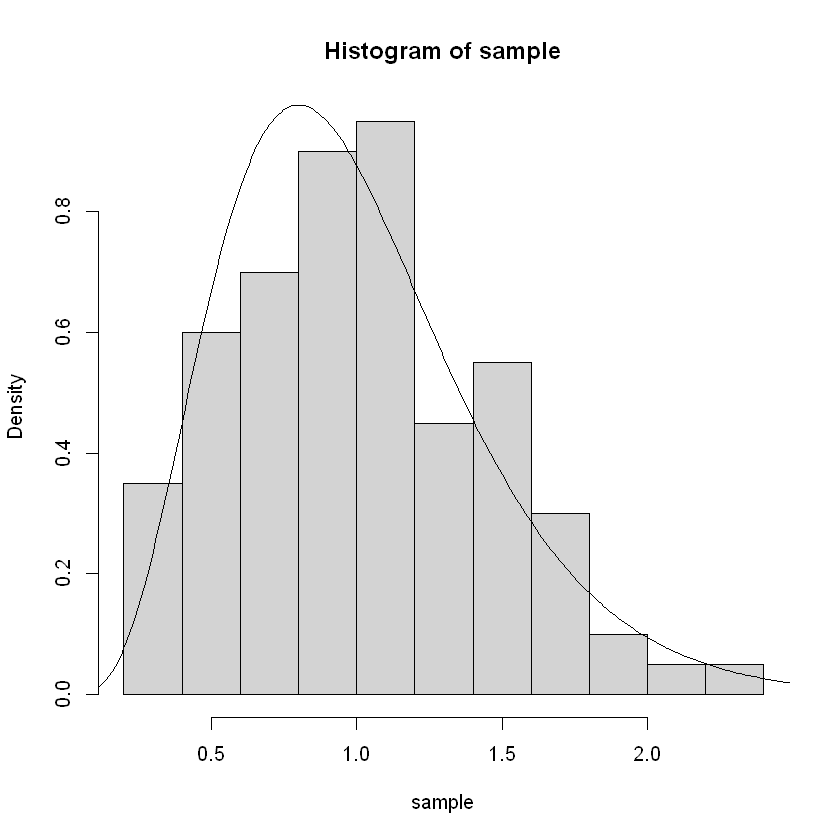

In [68]:
sample <- rgamma(100, 1, 5)
for(i in 1:4){
    sample = sample + rgamma(100, 1, 5)
}

hist(sample, freq=0)
lines(seq(0,3,0.01), dgamma(seq(0,3,0.01), 5, 5), ylim=c(0,1))

# Monte Carlo

- Basically its integral, but with simulations.
- Get n random points, see how many of those points are acceptable by the region that is covered by the f(x), get the ratio between accepted/all = result.
- If wanted to get $(-\infty, \infty)$ range use rnorm instead of runif

### Example

Say; $f(x) = e^{-x}$

[1] 0.9070364

0.9990881 with absolute error < 1.1e-14

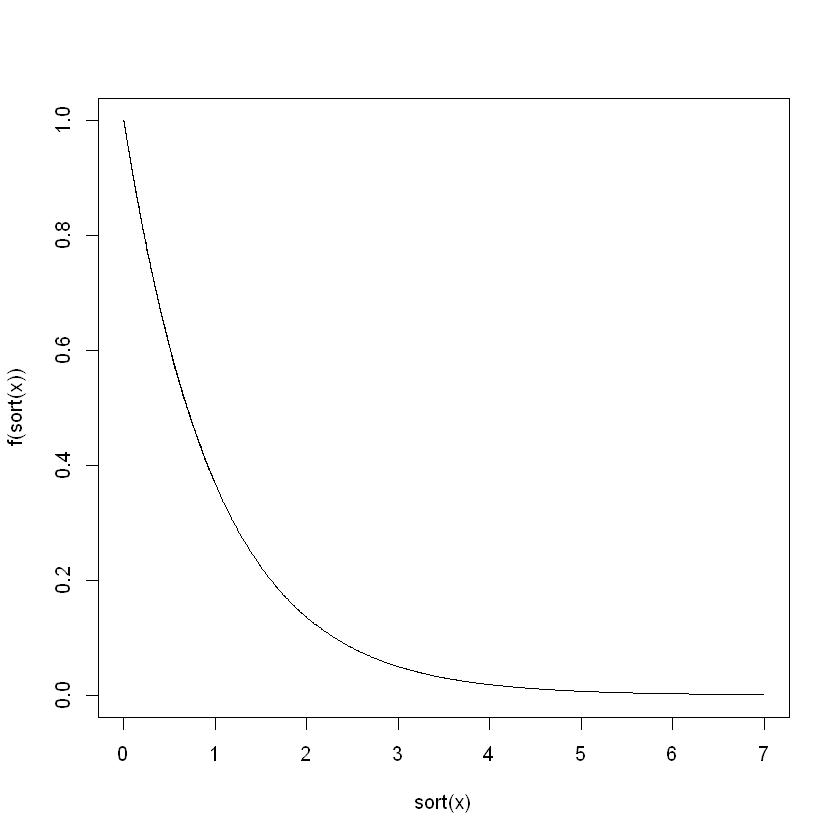

In [36]:
f <- \(x) exp(-x) #function
x <- runif(1000, 0, 5) #if from 0 to 5
plot(sort(x), f(sort(x)), type="l")
lines(seq(0,1,0.001), dexp(seq(0,1,0.001), 1))
res <- mean(f(x))*(5-0)
res
integrate(f, 0, 5)

In [43]:
k <- function(f, p1=0, p2=0){
    g <- \(x) if(x > p1){return(1)}else{return(0)}
    k <- mean(sapply(f(rnorm(1000)), g))
    return(k)
}
mean(k(f, 0, 1000))
integrate(f, 0, Inf)

[1] 1

1 with absolute error < 5.7e-05

## Variance Reduction
### PROPERTIES
- Antithetic & Control variate methods cannot be used with $\infty$ boundaries

### Antithetic Variables

- Using u $\sim Uni(a,b)$ and their counterpart (b-u) $\sim Uni(a,b)$ You can reduce variance of f(u) because the newly added Covariances 

In [58]:
f <- \(x) exp(-x)
u <- runif((10**4)/2, 0, 5)
x <- f(u)
y <- f(5-u)
ant <- (x+y)/2
mean(ant)*5
var(ant)

[1] 1.001008

[1] 0.01414407

In [48]:
f <- \(x) exp(-x)
n <- (10**4)/2
x <- runif(n, 0, 5)
mean(f(x))*5
var(f(x))

[1] 1.020749

[1] 0.06346307

### Control variate

In [59]:
#define parameters
n <- 10**4
x <- runif(n) # from 0 to 1

#define f(X) and g(X)

f.cont <- function(x) 1/(1+x)
g.cont <- function(x) 1+x

$$
c^* = -\frac{Cov(f(x), g(x))}{Var(g(x))}
$$

$$
MC = mean(f(x) + c^* (g(x) - \frac{1}{b-a} \int_{a}^{b} g(x) \,dx))\; *(b-a)
$$

$$
Var(MC) = Var(\theta^{c^*}) = Var(f(X)) - \frac{[Cov(f(X),g(X))]^2}{Var(g(X))}
$$

In [67]:
c_star <- -cov(f.cont(x),g.cont(x)) / var(g.cont(x))
c_star
mean(f.cont(x) + c_star * (g.cont(x) - (1/(1-0))*integrate(g.cont, 0, 1)$value))*(1-0)
integrate(f.cont, 0 ,1)

[1] 0.4776537

[1] 0.6933162

0.6931472 with absolute error < 7.7e-15

# Excersizes from book

## Monte Carlo

In [4]:
f <- \(x) sin(x)
x <- runif(10000, 0, 60)
mean(f(x))*60

[1] 1.745924

In [5]:
integrate(\(x) sin(x), 0, 60)

1.952413 with absolute error < 3.4e-06

In [12]:
f <- \(x) 1/sqrt(2*pi) * exp(-1/2 * x^2)
norm <- function(x){
    k <- runif(10000, 0, x)
    mc <- mean(f(k))*x
    var <- var(f(k))
    conf_up <- mc + qnorm(0.95, lower.tail = 1)*sqrt(var/10000)
    conf_down <- mc - qnorm(0.95, lower.tail = 1)*sqrt(var/10000)
    cat("Estimation from mc =", mc, ", Var of mc =", var, 
        "\nConfidence interval = (", conf_down,",",conf_up,")",
        "\nReal value =", 0.5-(1-pnorm(x)))
}
norm(2)

Estimation from mc = 0.476589 , Var of mc = 0.01331552 
Confidence interval = ( 0.474691 , 0.4784871 ) 
Real value = 0.4772499

In [1]:
n <- c(5, 30, 100)
M <- 10^4
mu <- 3; variance <- 5

In [16]:
mu_ <- matrix(0, ncol=3, nrow=M)
variance_ <- matrix(0, ncol=3, nrow=M)
for(i in 1:M){
    for(j in 1:3){
        mu_[i, j] <- mean(rnorm(n[j], mu, sqrt(variance)))
        variance_[i, j] <- var(rnorm(n[j], mu, sqrt(variance)))
    }
}
apply(mu_, 2, mean)-3
apply(variance_, 2, mean)-5

[1]  0.0239984741 -0.0028265704  0.0008142035

[1]  0.024028263 -0.011037532 -0.007163111

In [4]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [7]:
apply(mu_, 2, mean)

[1] -0.0202090535 -0.0093902415 -0.0007996173

In [27]:
n <- 10000
f <- function(x) exp(x)/(1+x)

start1 <- Sys.time()
u <- runif(n, 0, 1)
estimate_n <- mean(f(u))
variance_n <- var(f(u))
end1 <- Sys.time()

start2 <- Sys.time()
u <- runif(n/2, 0, 1)
x <- f(u)
y <- f(1-u)
ant <- (x+y)/2
estimate_ant <- mean(ant)
variance_ant <- var(ant)
end2 <- Sys.time()

cat("Estimate of normal mc =", estimate_n, ", variance = ", variance_n, ", taken time = ", as.numeric(end1-start1), "ms", 
   "\nEstimate of antithetic mc =", estimate_ant, ", variance = ", variance_ant, ", taken time = ", as.numeric(end2-start2), "ms")

Estimate of normal mc = 1.126077 , variance =  0.01151673 , taken time =  0.007977009 ms 
Estimate of antithetic mc = 1.124603 , variance =  0.0005687255 , taken time =  0.007979155 ms

In [32]:
f <- \(x) 1/(2*sqrt(2*pi)) * exp(-1/2 * ((x-8)/2)**2)
z_calculated = (7.5-8)/(2/sqrt(150))
u <- runif(n, -10, z_calculated)
mean(f(u))*(z_calculated+10)

[1] 0.00000001472647

as this is lower than 0.05 we can reject the null hypothesis. So yes they indeed drink less water.

In [29]:
options(scipen=99999999)

In [30]:
dnorm(10)

[1] 0.00000000000000000000007694599

In [48]:
f <- function(n, b, m){
    g <- \(x) -m/b * log(1-(m*x)/b)
    x <- matrix(g(runif(n*m)), ncol=m, nrow=n, byrow=1)
    return(apply(x, 1, sum))
}

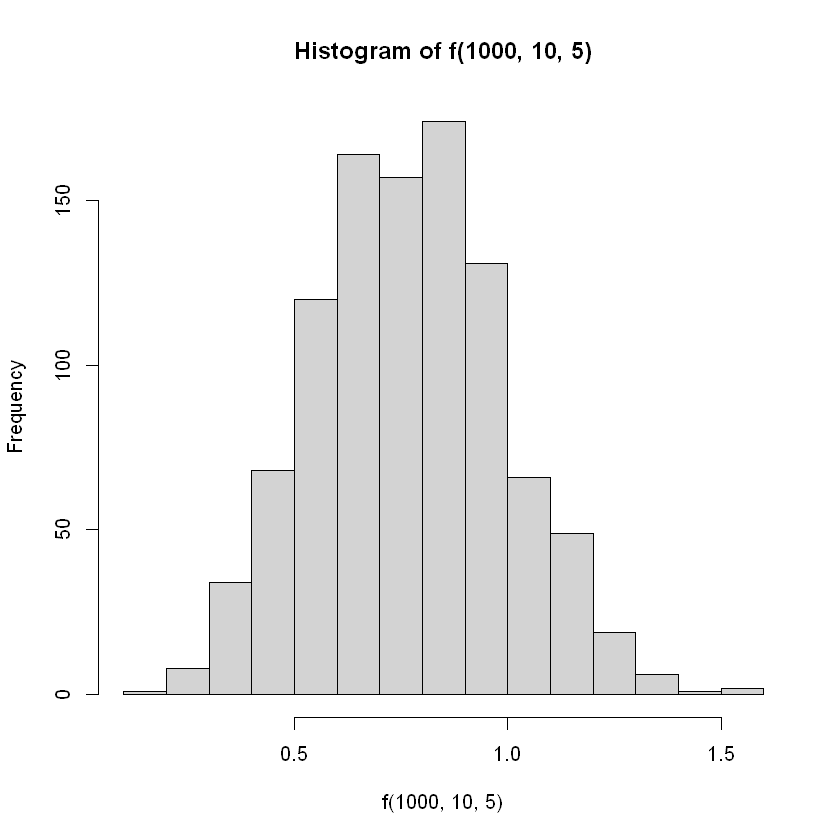

In [50]:
hist(f(1000, 10, 5))

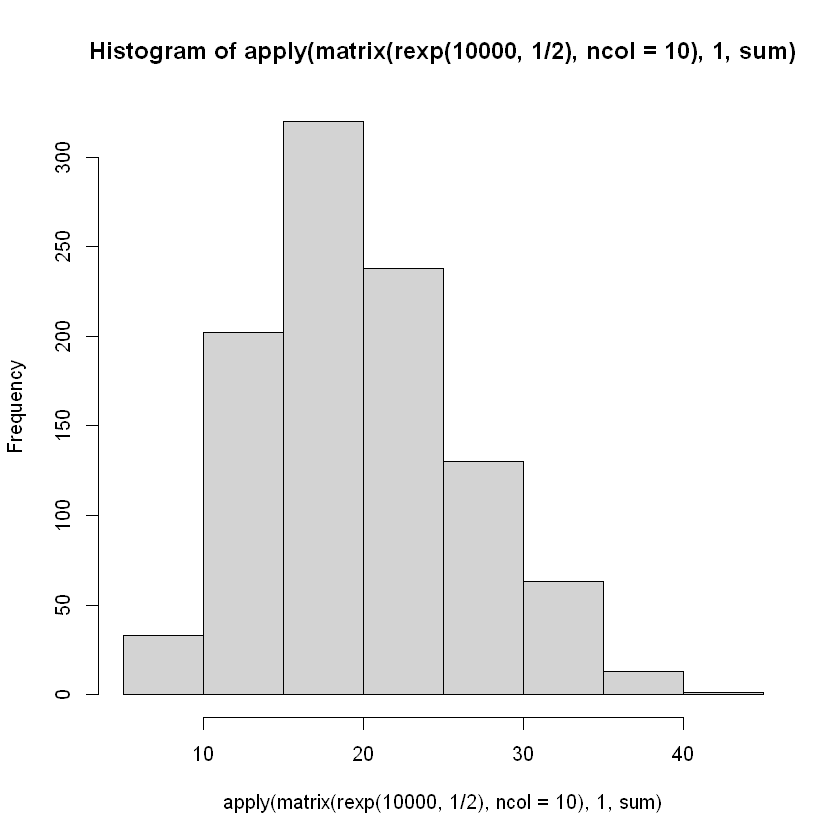

In [40]:
hist(apply(matrix(rexp(10000, 1/2), ncol=10), 1, sum))

# Monte Carlo Methods In Statistical Inference

## Statistic estimation using Monte Carlo

- Be sure of the formula you are trying to apply.

#### Example

x $\sim$ Gamma($\alpha = 4$, $\beta = 7$), take sample size as $n = 100,\; M = 10000$, find **MSE** of both $\alpha$ and $\beta$

$$
x \sim Gam(\alpha, \beta) \\
\Rightarrow E(x) = \alpha \beta \\
\Rightarrow Var(x) = \alpha \beta^2
$$

using these

$$
E(x) = \alpha \beta,\; Var(x) = \alpha \beta^2 \Rightarrow \alpha = \frac{E^2(x)}{Var(x)}, \beta = \frac{Var(x)}{E(x)}
$$

and for the MSE and Bias

$$
MSE = Var(\hat{\theta}) + Bias^2(\theta) \\
Bias(\theta) = \frac{\sum{\hat{\theta_i}}}{N} - \theta
$$

In [15]:
bias_mse <- matrix(0,ncol = 2 , nrow = 2, 
               dimnames = list(c("Bias","MSE"),
                               c("alpha","beta"))) #for result

MSE <- \(n,alpha,beta) {
    M <- 10^4 # 10000 replicates
    alpha.hat <- numeric(M)
    beta.hat <- numeric(M)
    for(i in 1:M){
      x <- rgamma(n,alpha,beta) #generate n gamma distributed random numbers
      
      beta.hat[i] <- mean(x)/var(x)
      alpha.hat[i] <- (mean(x))^2 / var(x)
    }

    #bias estimation
    bias_mse[1,1] <- mean(alpha.hat) - alpha
    bias_mse[1,2] <- mean(beta.hat) - beta
    
    #MSE estimation
    bias_mse[2,1] <- var(alpha.hat) + (mean(alpha.hat) - alpha)^2
    bias_mse[2,2] <- var(beta.hat) + (mean(beta.hat) - beta)^2
    
    print(bias_mse)
  }

MSE(n=100, alpha=4, beta=7)

         alpha      beta
Bias 0.1188180 0.2301708
MSE  0.4419034 1.5046290


# OLD FINAL

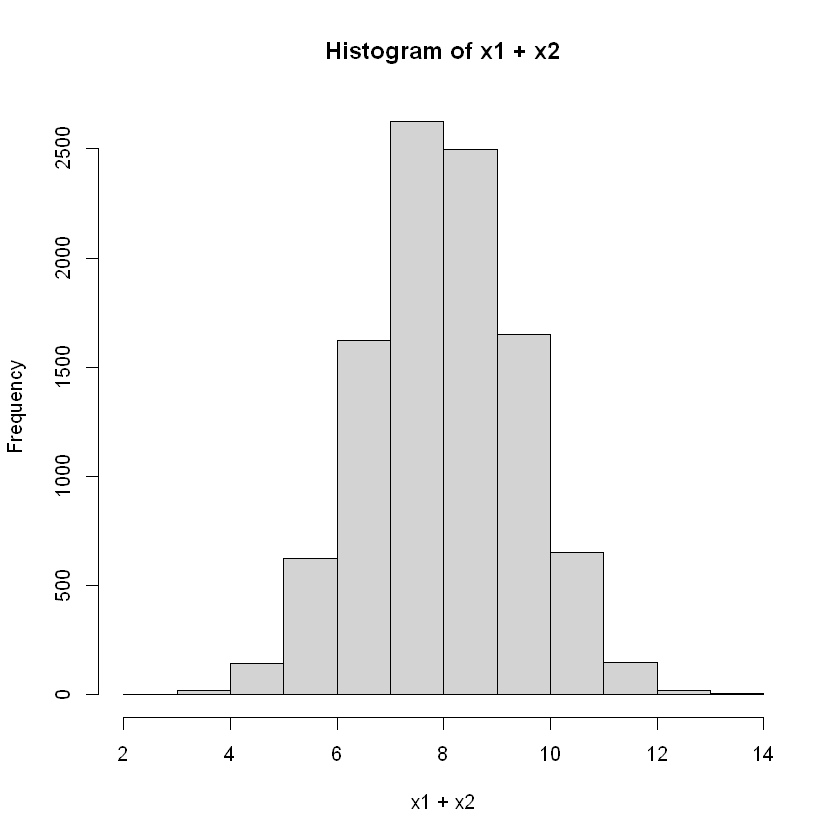

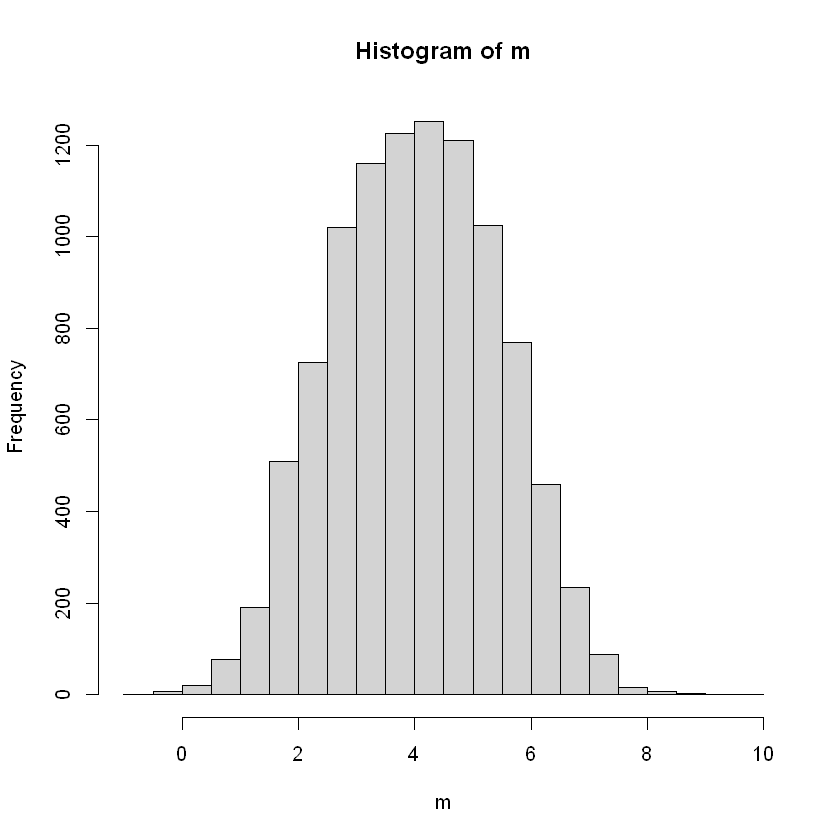

In [38]:
# convolution
# x1 + x2
x1 <- rnorm(10000, 3, 1)
x2 <- rnorm(10000, 5, 1)
hist(x1 + x2)

# mixture
m <- c(sample(x1, length(x1)/2), sample(x2, length(x2)/2))
hist(m, breaks=20)

In [39]:
density(m)


Call:
	density.default(x = m)

Data: m (10000 obs.);	Bandwidth 'bw' = 0.2001

       x                y            
 Min.   :-1.173   Min.   :2.280e-06  
 1st Qu.: 1.685   1st Qu.:1.385e-03  
 Median : 4.543   Median :3.442e-02  
 Mean   : 4.543   Mean   :8.739e-02  
 3rd Qu.: 7.401   3rd Qu.:1.878e-01  
 Max.   :10.259   Max.   :2.496e-01  

In [45]:
M <- 10^4
asuc <- 0
bsuc <- 0

for(i in 1:M){
    a <- runif(100, 0, 2)
    b <- rexp(100, 1)
    if(t.test(a, alternative = "two.sided", mu=1)$p.value <= 0.05)(asuc = asuc+1)
    if(t.test(b, alternative = "two.sided", mu=1)$p.value <= 0.05)(bsuc = bsuc+1)
}

asuc/M
bsuc/M

[1] 0.0525

[1] 0.0563